In [1]:
library(Seurat)


Attaching SeuratObject



<h1>(Morris et al. 2022)</h1

In [2]:
load( "data/ovaryAdult-mesenchyme.Rdata")
pbmcAdult = pbmc


In [3]:
colnames(pbmc[[]])

[1] "nGene"            "nUMI"             "orig.ident"       "batch"           
 [5] "fraction.mito"    "condition"        "dominant_index"   "percent_dominant"
 [9] "Level0"           "doubletSimScore"  "doubletSimCall"   "mouse"           
[13] "Level1"           "Level2"           "nCount_RNA"       "nFeature_RNA"    
[17] "RNA_snn_res.0.3"  "seurat_clusters"

<h1>Merge data (Niu & Spradling 2020)</h1>

In [4]:
# load emb data
pbmcAdult = pbmc
load( "data/ovaryP1-P5-mesenchyme.Rdata")
pbmc

An object of class Seurat 
13377 features across 4512 samples within 1 assay 
Active assay: RNA (13377 features, 1999 variable features)
 2 dimensional reductions calculated: pca, umap

In [5]:
pbmc <- merge(pbmcAdult, y = pbmc, add.cell.ids = c("early", "adult"), project = "pbmcOvary")
pbmc


An object of class Seurat 
24709 features across 14509 samples within 1 assay 
Active assay: RNA (24709 features, 0 variable features)

In [6]:
genes = row.names(pbmc)
pbmc <- ScaleData(pbmc,genes)

Centering and scaling data matrix



Normalizing across features

Warning message in asMethod(object):
“sparse->dense coercion: allocating vector of size 2.7 GiB”
PC_ 1 
Positive:  Hsd3b1, Acsbg1, Cyp11a1, Aldh1a1, Mgarp, Cxcl14, Star, Stc1, Enpep, Thbs4 
	   Epas1, Hao2, Hhip, Spon1, Cyp17a1, Efhd1, Pak3, Rasd1, Serpina5, Mt2 
	   Ifi203, E330017L17Rik, Ano1, Figf, Ccdc3, Folr1, Colec11, Thy1, Steap4, Serpina3g 
Negative:  Rps12, Tceal9, Fau, Elob, Sept7, Atp5o.1, Sem1, Selenoh, Cfl1, Bex3 
	   Rpl35, Hmgn2, 2010107E04Rik, Rtraf, Ptn, Snu13, Selenof, Selenok, Selenow, 1110004F10Rik 
	   Atp2b1, Hmgb2, Rps27, Lgals1, Meg3, Jpt1, 1810058I24Rik, Pclaf, Dlk1, Eloc 
PC_ 2 
Positive:  Prc1, Nusap1, Kif23, Top2a, Cenpf, Cdca8, Hmmr, Mki67, Spc25, Ccna2 
	   Cdca3, Ckap2l, Knl1, Mxd3, Birc5, Aurkb, Ube2c, Racgap1, Mis18bp1, Ckap2 
	   Cdca2, Ccnb1, Lockd, Tpx2, Kif22, Esco2, Pimreg, Pbk, Ccnb2, Cdc20 
Negative:  Meg3, Rps27, Mfap4, Fau, Rps12, Selenow, Dlk1, Rpl35, 1810058I24Rik, Lsp1 
	   Nop53, Selenom, Selenos, Rtraf, Ptn, Mf

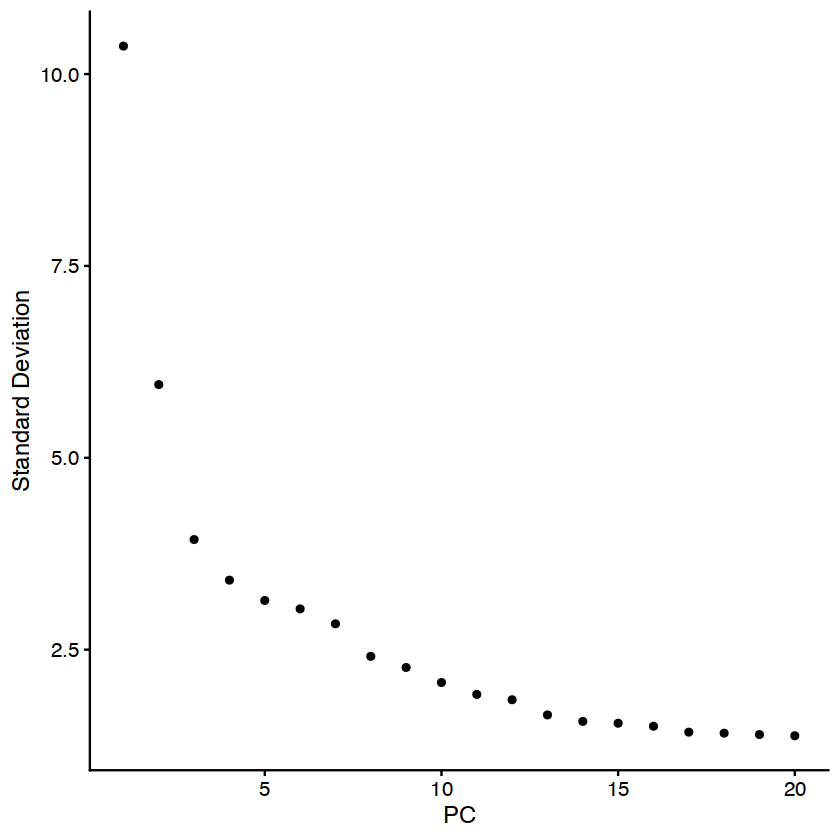

In [7]:
pbmc <- NormalizeData(pbmc, normalization.method = "CLR", scale.factor = 10000)
pbmc <- FindVariableFeatures(pbmc, selection.method = "vst", nfeatures = 1000)
pbmc <- RunPCA(pbmc, features = VariableFeatures(object = pbmc))
ElbowPlot(pbmc)

In [8]:
pbmc <- FindNeighbors(pbmc, dims = c(1:17))
pbmc <- FindClusters(pbmc, resolution = 0.6)


Computing nearest neighbor graph

Computing SNN



Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 14509
Number of edges: 500948

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8897
Number of communities: 12
Elapsed time: 6 seconds


In [9]:
# min.dist = 0.1
pbmc <- RunUMAP(pbmc, reduction = "pca", dims = c(1:17), 
  spread = 1, min.dist = 0.2)

Warning message:
“The default method for RunUMAP has changed from calling Python UMAP via reticulate to the R-native UWOT using the cosine metric
To use Python UMAP via reticulate, set umap.method to 'umap-learn' and metric to 'correlation'
This message will be shown once per session”
17:32:31 UMAP embedding parameters a = 1.262 b = 1.003

17:32:31 Read 14509 rows and found 17 numeric columns

17:32:31 Using Annoy for neighbor search, n_neighbors = 30

17:32:31 Building Annoy index with metric = cosine, n_trees = 50

0%   10   20   30   40   50   60   70   80   90   100%

[----|----|----|----|----|----|----|----|----|----|

*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
|

17:32:36 Writing NN index file to temp file /var/folders/9q/bcmy70lj3f7_0km479f7zckh0000gp/T//RtmpkjjqkN/file72986385337d

17:32:36 Searching Annoy index using 1 thread, search_k = 3000

17:32:48 Annoy recall = 100%

17:32:49 Commencing smooth kNN distance calibrat

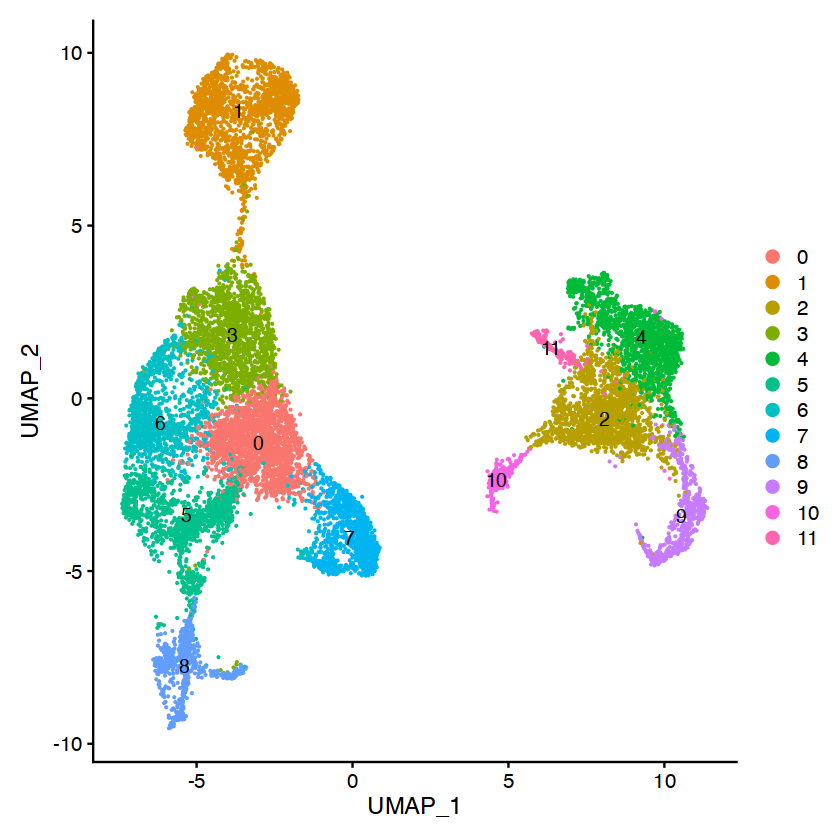

In [10]:
DimPlot(pbmc, reduction = "umap", label =TRUE,raster=FALSE)

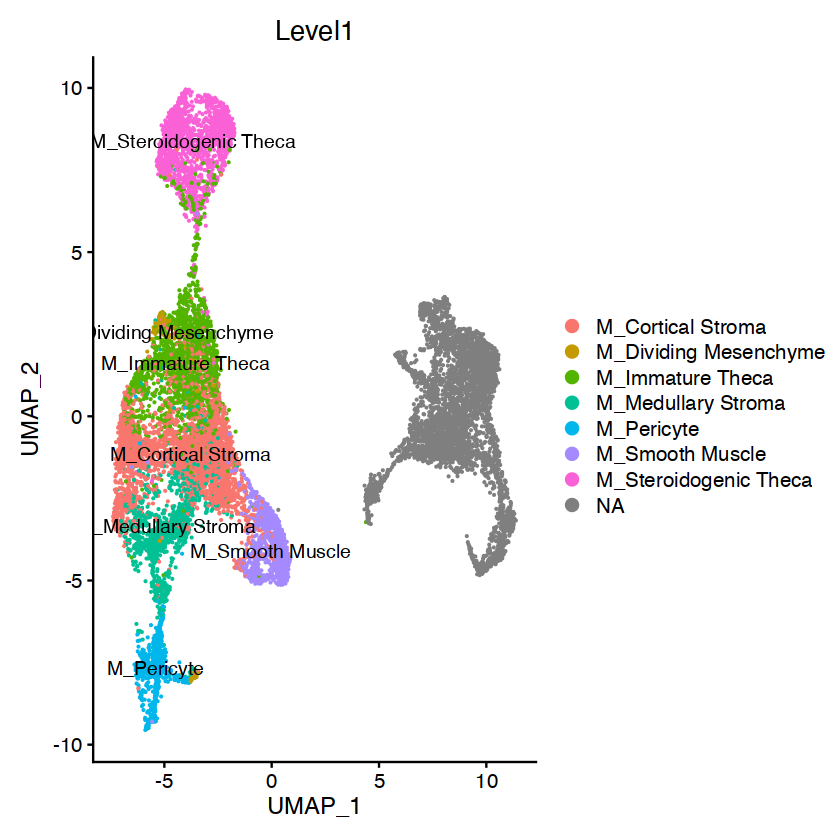

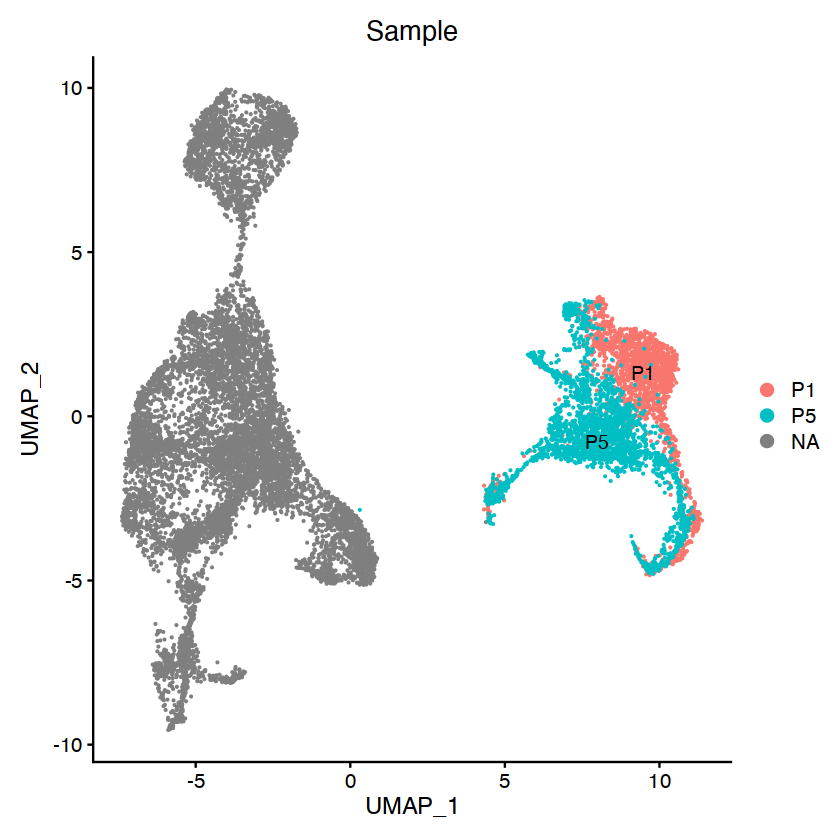

In [11]:
DimPlot(pbmc, reduction = "umap", group.by = "Level1", label =TRUE,raster=FALSE)
DimPlot(pbmc, reduction = "umap", group.by = "Sample", label =TRUE,raster=FALSE)

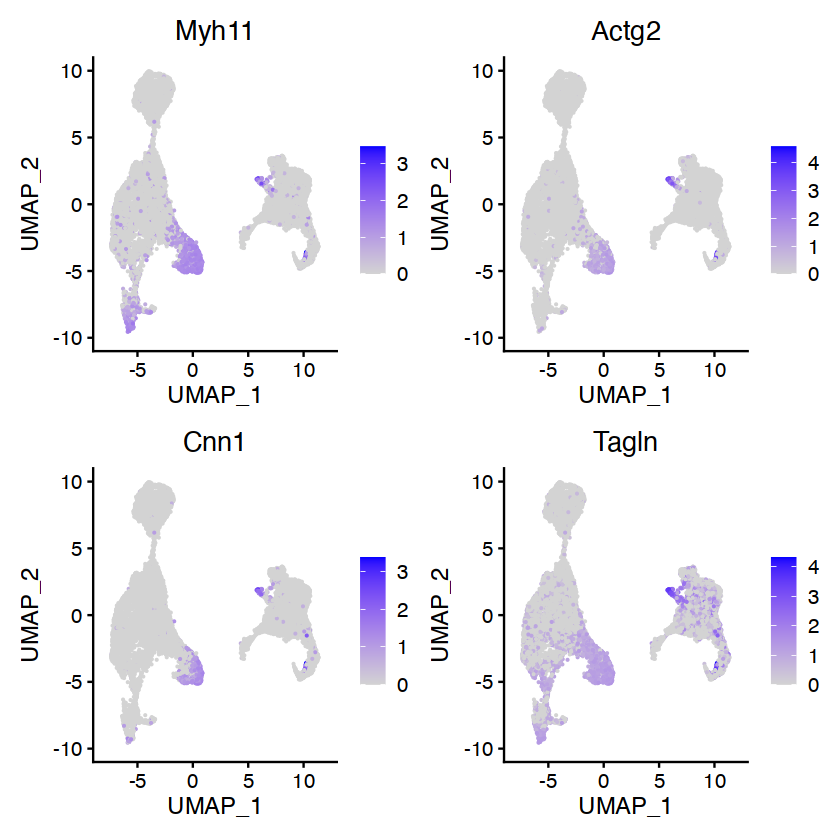

In [12]:
#Smooth muscle
FeaturePlot(pbmc, features = c("Myh11","Actg2","Cnn1","Tagln"),raster=FALSE)

In [13]:
pbmc <- RenameIdents(pbmc, '7' = 'Smooth muscle'
                          )
pbmc <- RenameIdents(pbmc, '11' = 'Early smooth muscle'
                          )

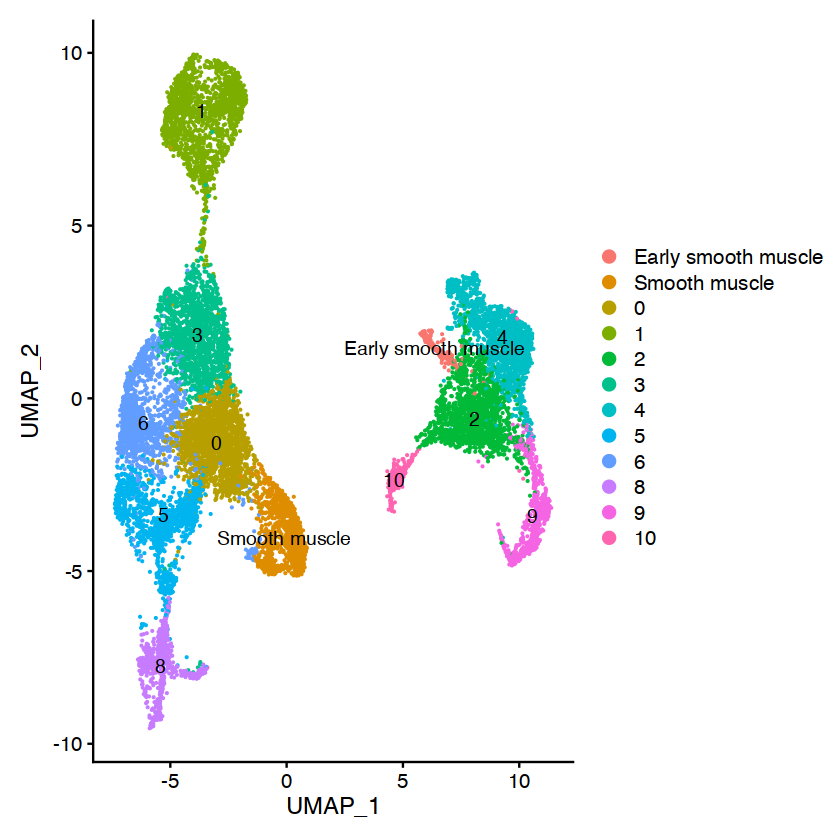

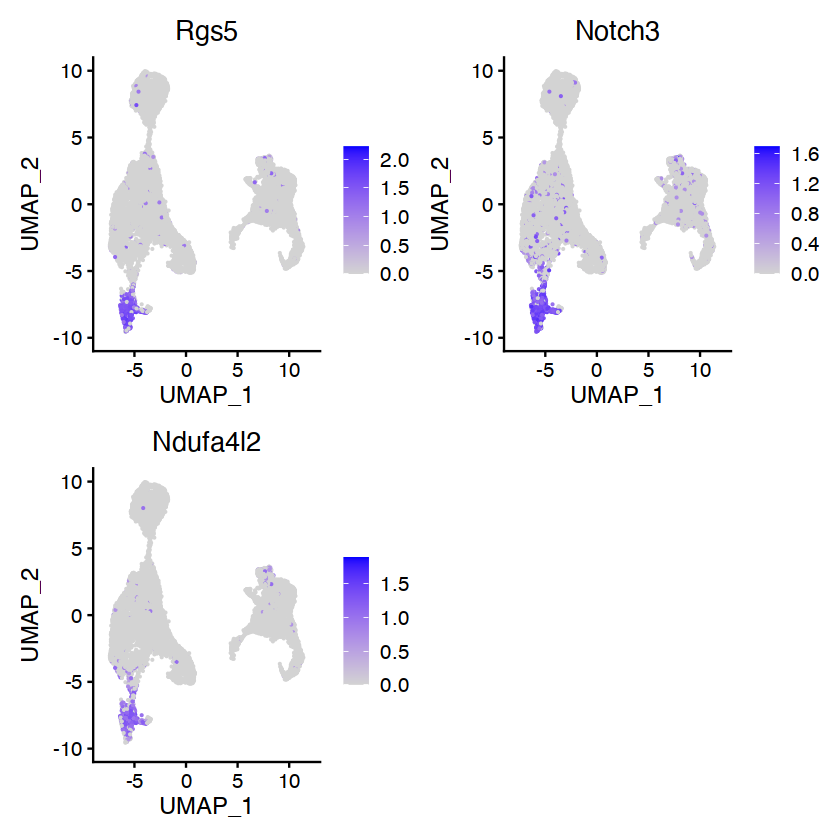

In [14]:
#Pericyte
DimPlot(pbmc, reduction = "umap",label = TRUE)
FeaturePlot(pbmc, features = c("Rgs5","Notch3","Ndufa4l2"),raster=FALSE)

In [15]:
pbmc <- RenameIdents(pbmc, '8' = 'Pericyte'
                          )

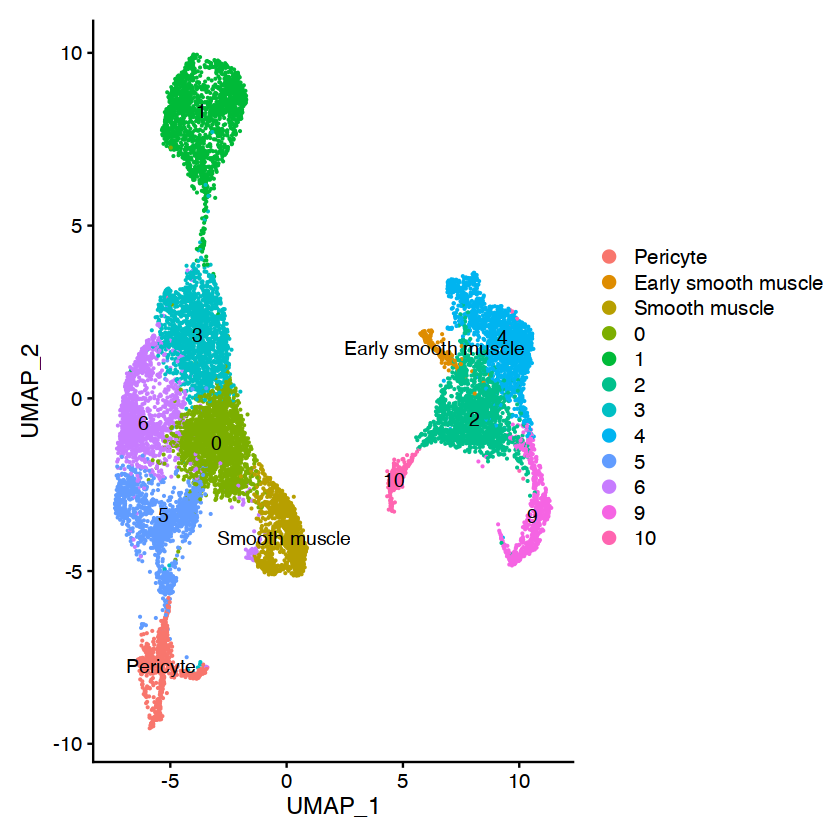

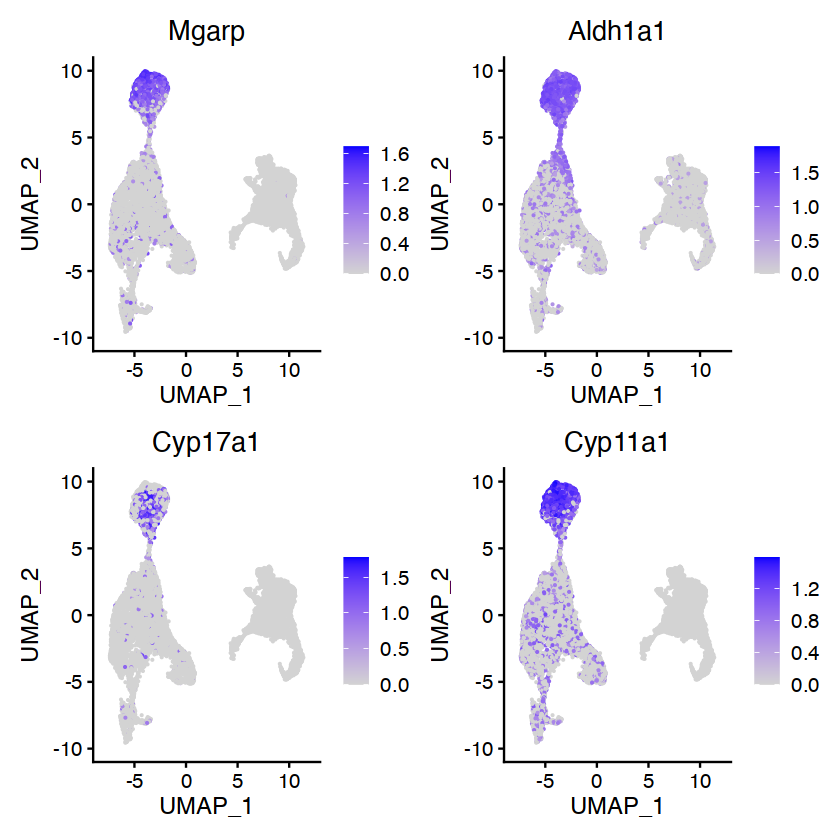

In [16]:
#Steroidogenic theca
DimPlot(pbmc, reduction = "umap",label = TRUE)
FeaturePlot(pbmc, features = c("Mgarp","Aldh1a1","Cyp17a1","Cyp11a1"),raster=FALSE)

In [17]:
pbmc <- RenameIdents(pbmc, '1' = 'Steroidogenic theca'
                          )

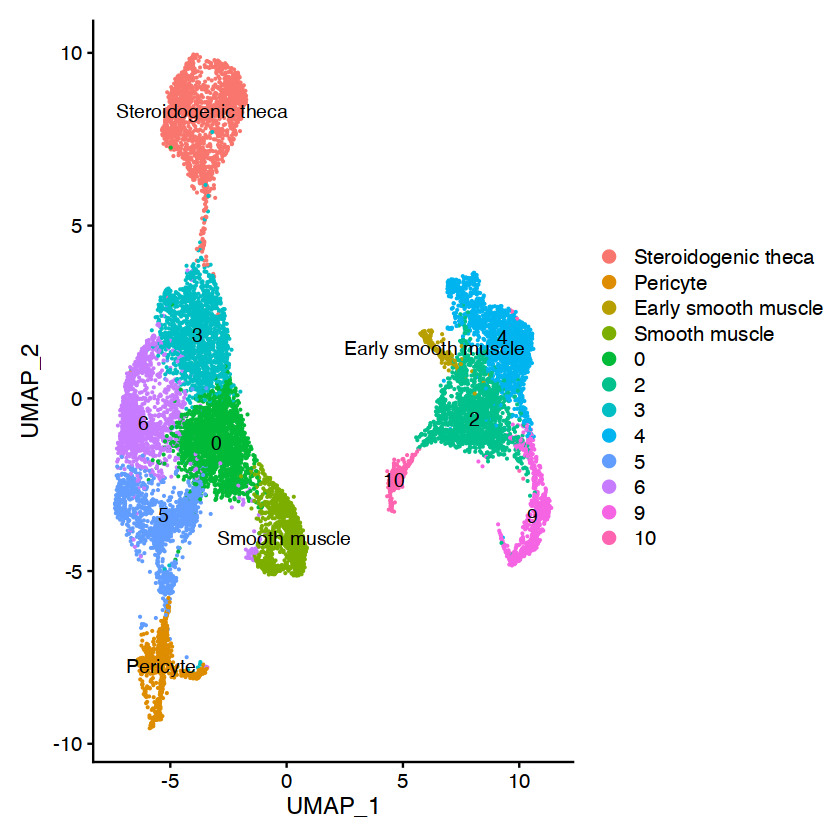

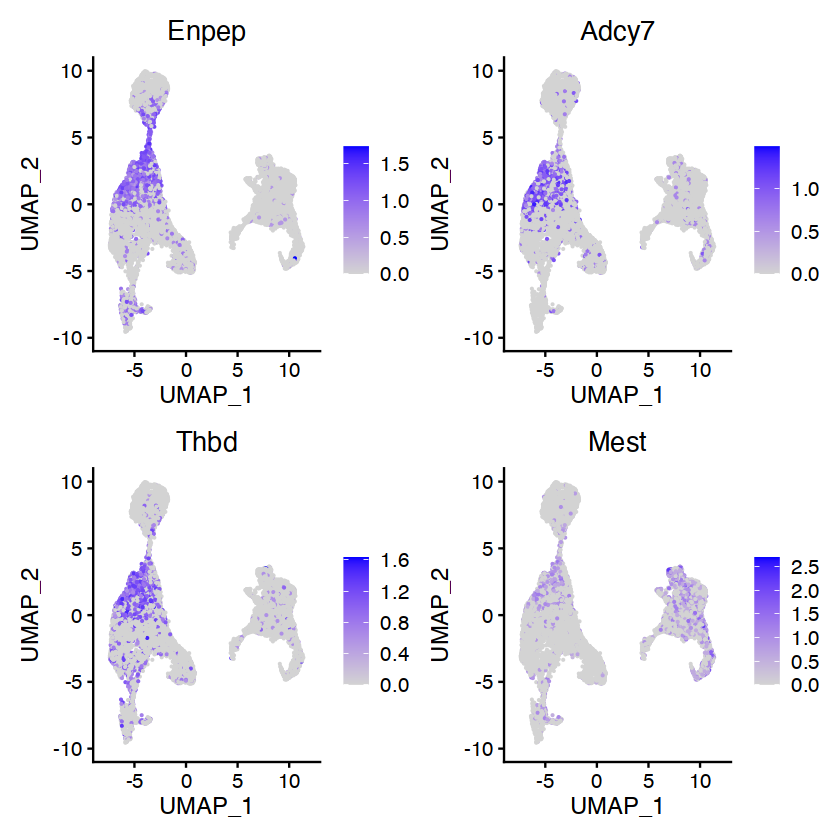

In [18]:
#Early theca
DimPlot(pbmc, reduction = "umap",label = TRUE)
FeaturePlot(pbmc, features = c("Enpep","Adcy7","Thbd","Mest"),raster=FALSE)

In [19]:
pbmc <- RenameIdents(pbmc, '3' = 'Early theca'
                          )

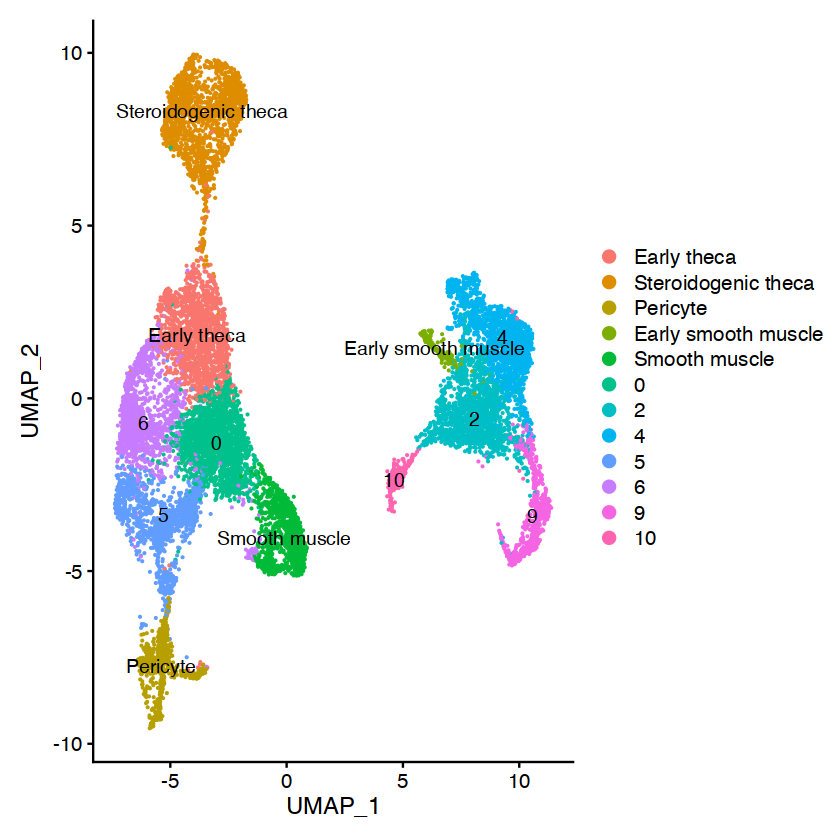

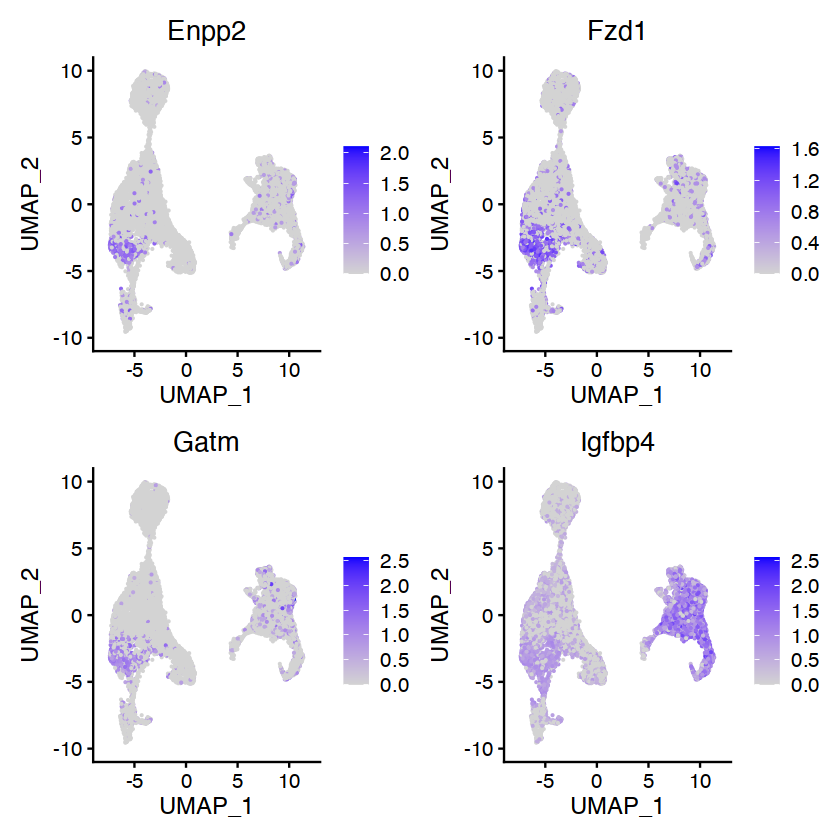

In [20]:
#Fibroblast-like stroma
DimPlot(pbmc, reduction = "umap",label = TRUE)
FeaturePlot(pbmc, features = c("Enpp2","Fzd1","Gatm","Igfbp4"),raster=FALSE)

In [21]:
pbmc <- RenameIdents(pbmc, '5' = 'Fibroblast-like stroma'
                          )

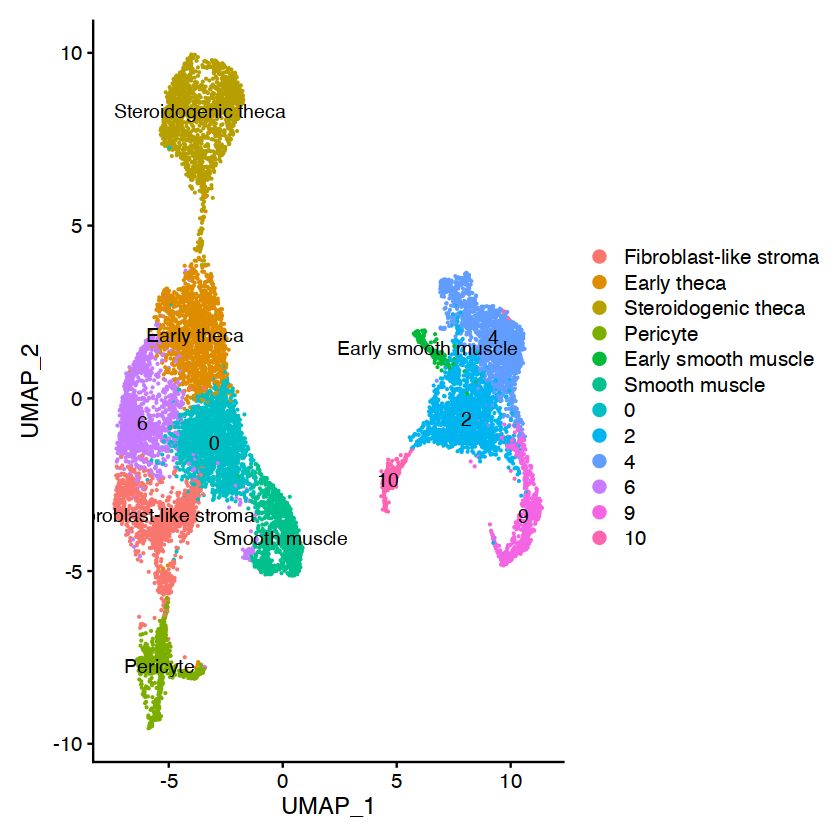

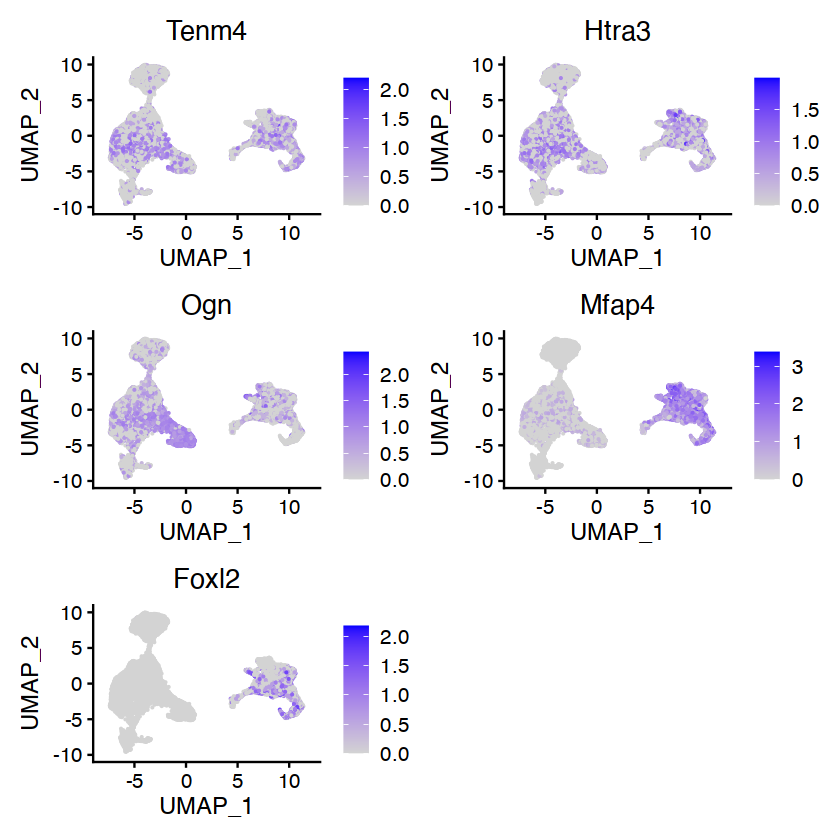

In [22]:
#Steroidogenic Stroma
DimPlot(pbmc, reduction = "umap",label = TRUE)
FeaturePlot(pbmc, features = c("Tenm4","Htra3","Ogn","Mfap4","Foxl2"),raster=FALSE)

In [23]:
pbmc <- RenameIdents(pbmc, '6' = 'Steroidogenic stroma','0' = 'Steroidogenic stroma'
                          )

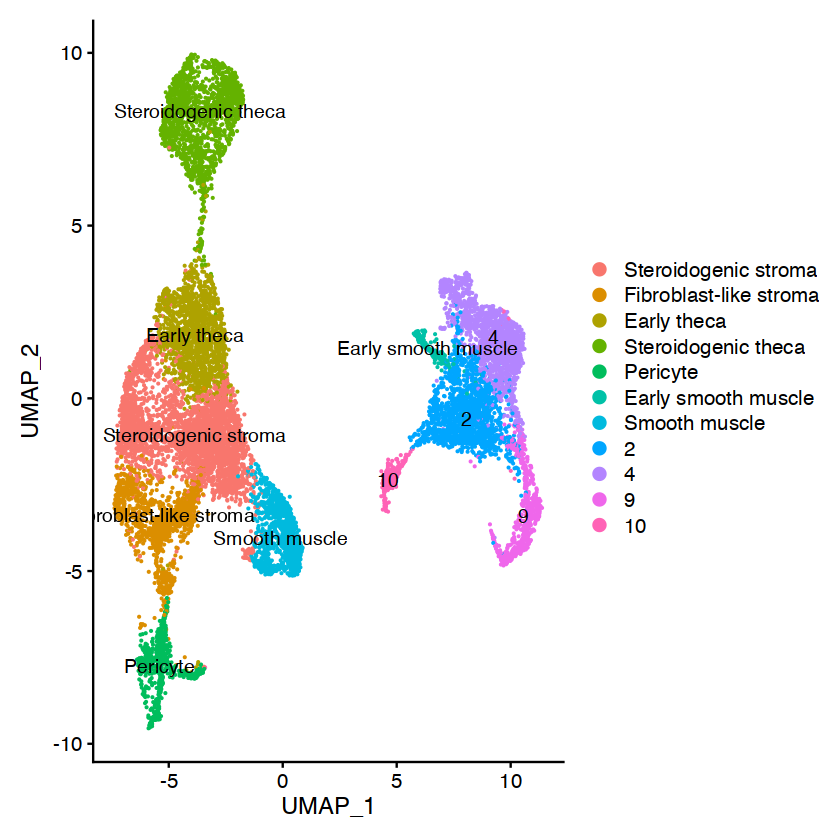

In [24]:
DimPlot(pbmc, reduction = "umap",label = TRUE)

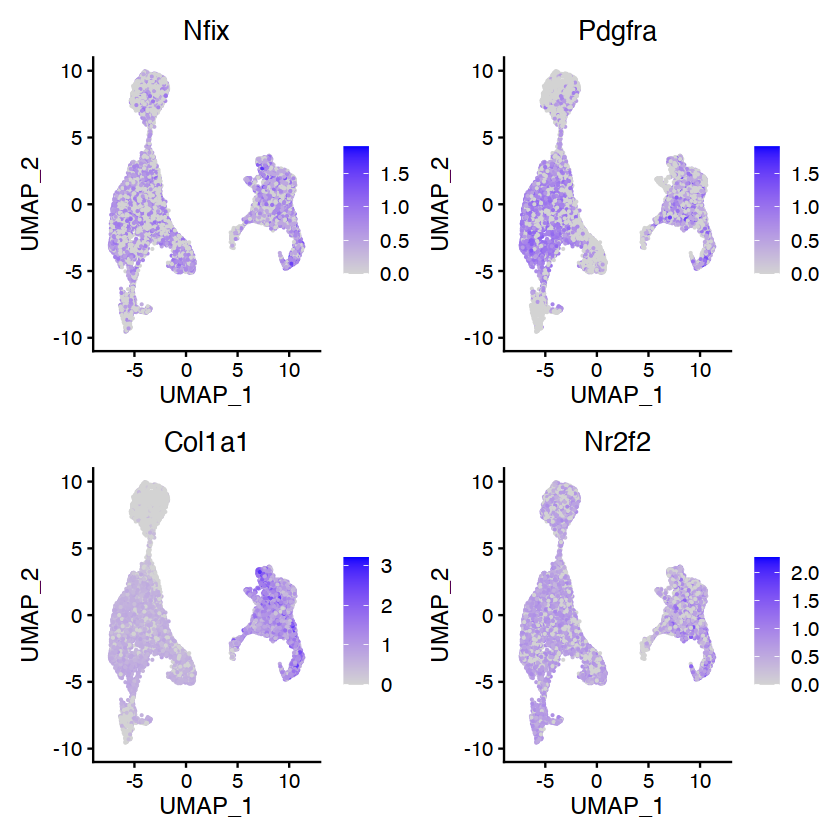

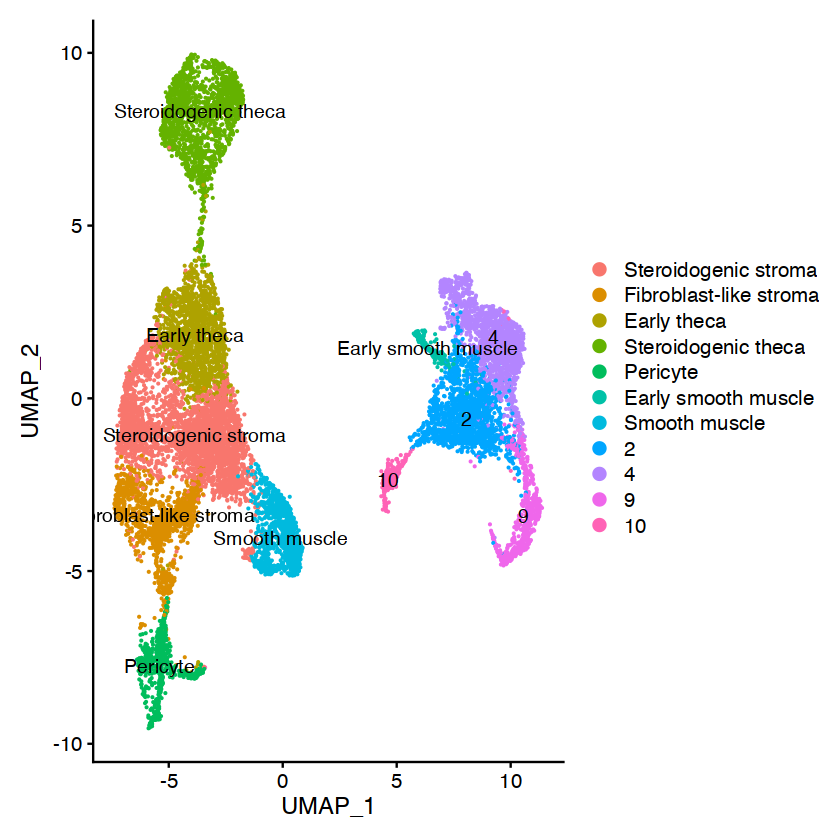

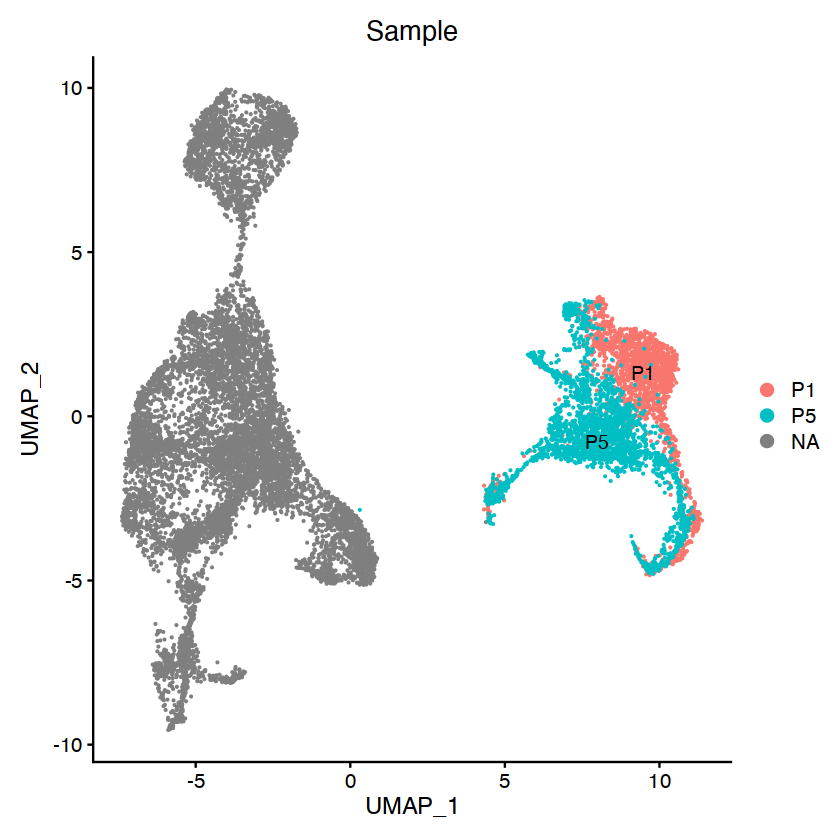

In [25]:
#Stroma progenitors
FeaturePlot(pbmc, features = c("Nfix","Pdgfra","Col1a1","Nr2f2"))
DimPlot(pbmc, reduction = "umap", label =TRUE)
DimPlot(pbmc, reduction = "umap", group.by = "Sample", label =TRUE)

In [26]:
pbmc <- RenameIdents(pbmc, '2' = 'Stroma progenitors P5','4' = 'Stroma progenitors P1')

In [27]:
#pbmc = subset(x = pbmc, idents = c("10","9"), invert = TRUE)

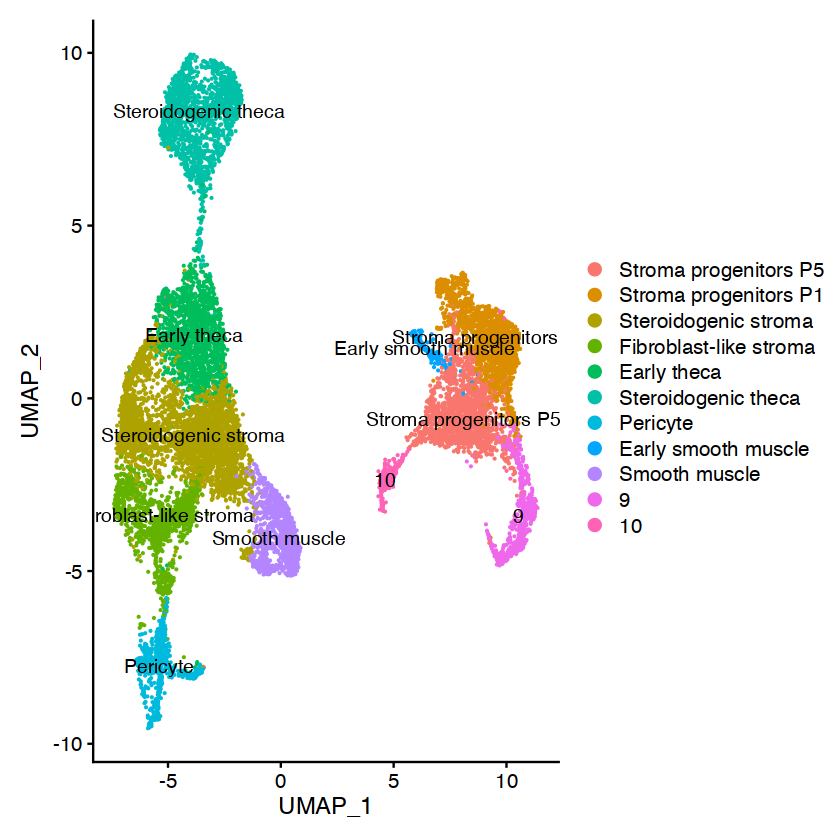

In [28]:
DimPlot(pbmc, reduction = "umap",label = TRUE)

In [29]:
library(ggplot2)

In [30]:
library(dittoSeq)

In [31]:
cluster9.markers <- FindMarkers(pbmc, ident.1 = 9, 
                                 ident.2 = "Stroma progenitors P5", 
                                 min.pct = 0.30,
                                test.use = "roc", only.pos = TRUE)


UpGenes <- head(cluster9.markers[order(-cluster9.markers["avg_log2FC"]),],10)
head(UpGenes, n=10)

Warning message in xtfrm.data.frame(x):
“cannot xtfrm data frames”


myAUC avg_diff power avg_log2FC pct.1 pct.2
Pclaf     0.954 2.044801 0.908 1.440776   0.928 0.071
Top2a     0.945 2.052497 0.890 1.435175   0.904 0.057
Hmgb2     0.993 2.235128 0.986 1.306685   1.000 0.609
Stmn1     0.985 1.939791 0.970 1.204610   0.997 0.606
Birc5     0.916 1.536389 0.832 1.168017   0.850 0.068
Hist1h2ap 0.826 1.841383 0.652 1.164661   0.669 0.039
Smc2      0.958 1.536344 0.916 1.155196   0.955 0.240
Mki67     0.902 1.493484 0.804 1.125026   0.816 0.030
Cenpf     0.848 1.758214 0.696 1.105713   0.717 0.041
Cks2      0.909 1.573650 0.818 1.102569   0.876 0.183

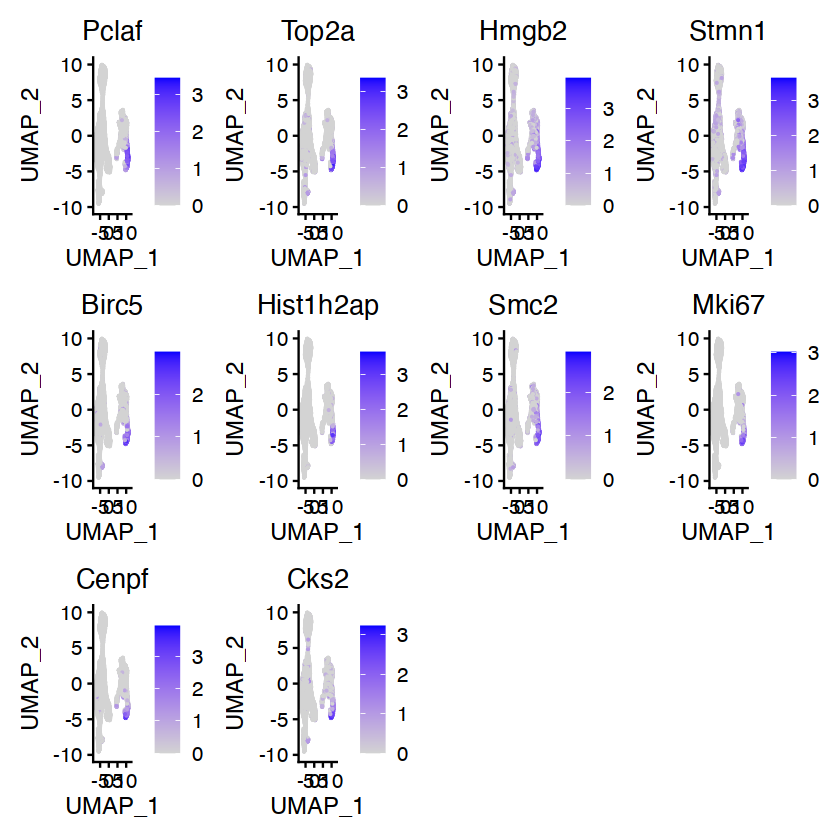

In [32]:
FeaturePlot(pbmc, features = row.names(UpGenes[1:10,]) )

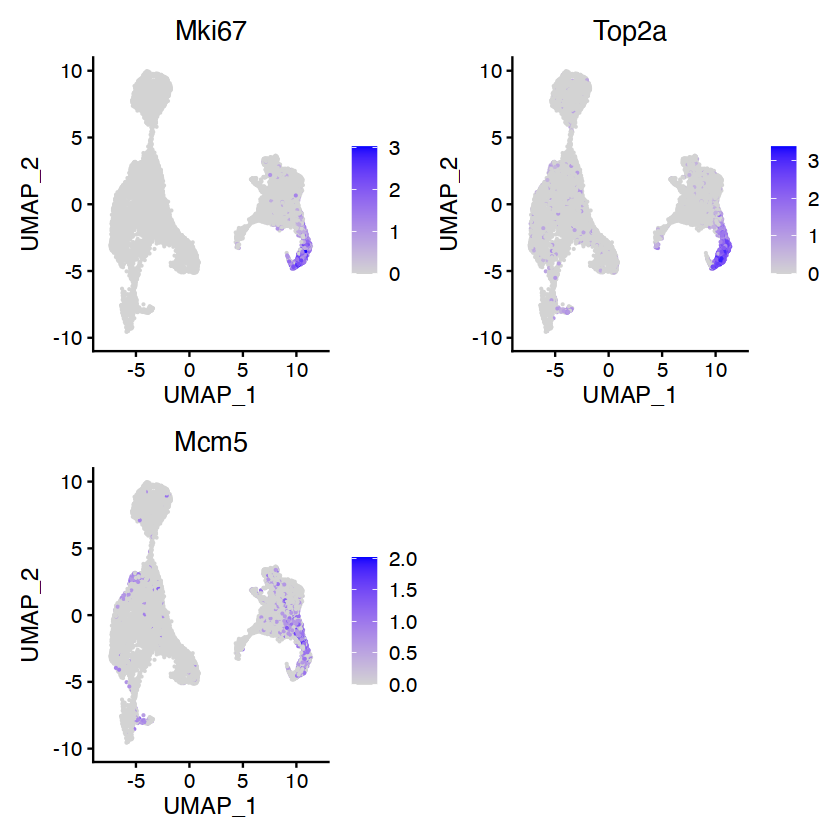

In [33]:
#cell cycle genes such as Mki67, Top2a, and Mcm5
FeaturePlot(pbmc, features = c("Mki67","Top2a","Mcm5") )

In [34]:
library(org.Mm.eg.db)
library(AnnotationDbi)
library("clusterProfiler")

Loading required package: AnnotationDbi

Loading required package: stats4

Loading required package: BiocGenerics


Attaching package: ‘BiocGenerics’


The following objects are masked from ‘package:stats’:

    IQR, mad, sd, var, xtabs


The following objects are masked from ‘package:base’:

    anyDuplicated, aperm, append, as.data.frame, basename, cbind,
    colnames, dirname, do.call, duplicated, eval, evalq, Filter, Find,
    get, grep, grepl, intersect, is.unsorted, lapply, Map, mapply,
    match, mget, order, paste, pmax, pmax.int, pmin, pmin.int,
    Position, rank, rbind, Reduce, rownames, sapply, setdiff, sort,
    table, tapply, union, unique, unsplit, which.max, which.min


Loading required package: Biobase

Welcome to Bioconductor

    Vignettes contain introductory material; view with
    'browseVignettes()'. To cite Bioconductor, see
    'citation("Biobase")', and for packages 'citation("pkgname")'.


Loading required package: IRanges

Loading required package: S4Vectors

In [35]:
#BP MF CC
GO_results <- enrichGO(gene = row.names(UpGenes) , 
                       OrgDb = "org.Mm.eg.db", keyType = "SYMBOL", ont = "BP")

In [36]:
as.data.frame(GO_results)

ID        
GO:0051321 GO:0051321
GO:0007059 GO:0007059
GO:0000280 GO:0000280
GO:0140013 GO:0140013
GO:1903046 GO:1903046
GO:0098813 GO:0098813
GO:0051983 GO:0051983
GO:0051304 GO:0051304
GO:0007127 GO:0007127
GO:0061982 GO:0061982
GO:1905820 GO:1905820
GO:0000819 GO:0000819
GO:0051984 GO:0051984
GO:0033044 GO:0033044
GO:0030261 GO:0030261
GO:0140014 GO:0140014
GO:0010639 GO:0010639
GO:0051310 GO:0051310
GO:0000281 GO:0000281
GO:0051303 GO:0051303
GO:0044772 GO:0044772
GO:0050000 GO:0050000
GO:2001251 GO:2001251
GO:0061640 GO:0061640
GO:0045132 GO:0045132
GO:1905818 GO:1905818
GO:0007088 GO:0007088
GO:0007052 GO:0007052
GO:0000086 GO:0000086
GO:0051783 GO:0051783
⋮          ⋮         
GO:2000816 GO:2000816
GO:1901976 GO:1901976
GO:1902100 GO:1902100
GO:0007080 GO:0007080
GO:0031577 GO:0031577
GO:0032392 GO:0032392
GO:0045646 GO:0045646
GO:1902041 GO:1902041
GO:1905819 GO:1905819
GO:0051985 GO:0051985
GO:0007131 GO:0007131
GO:0032467 GO:0032467
GO:0033047 GO:0033047
GO:0140527 GO:0140527
GO:0007019 GO:0007019
GO:0031113 GO:0031113
GO:0046580 GO:0046580
GO:1901861 GO:1901861
GO:0045839 GO:0045839
GO:0043388 GO:0043388
GO:0071103 GO:0071103
GO:0035825 GO:0035825
GO:0048524 GO:0048524
GO:0045744 GO:0045744
GO:0051058 GO:0051058
GO:0032608 GO:0032608
GO:0032648 GO:0032648
GO:0050891 GO:0050891
GO:0051784 GO:0051784
GO:0090307 GO:0090307
           Description                                                                   
GO:0051321 meiotic cell cycle                                                            
GO:0007059 chromosome segregation                                                        
GO:0000280 nuclear division                                                              
GO:0140013 meiotic nuclear division                                                      
GO:1903046 meiotic cell cycle process                                                    
GO:0098813 nuclear chromosome segregation                                                
GO:0051983 regulation of chromosome segregation                                          
GO:0051304 chromosome separation                                                         
GO:0007127 meiosis I                                                                     
GO:0061982 meiosis I cell cycle process                                                  
GO:1905820 positive regulation of chromosome separation                                  
GO:0000819 sister chromatid segregation                                                  
GO:0051984 positive regulation of chromosome segregation                                 
GO:0033044 regulation of chromosome organization                                         
GO:0030261 chromosome condensation                                                       
GO:0140014 mitotic nuclear division                                                      
GO:0010639 negative regulation of organelle organization                                 
GO:0051310 metaphase plate congression                                                   
GO:0000281 mitotic cytokinesis                                                           
GO:0051303 establishment of chromosome localization                                      
GO:0044772 mitotic cell cycle phase transition                                           
GO:0050000 chromosome localization                                                       
GO:2001251 negative regulation of chromosome organization                                
GO:0061640 cytoskeleton-dependent cytokinesis                                            
GO:0045132 meiotic chromosome segregation                                                
GO:1905818 regulation of chromosome separation                                           
GO:0007088 regulation of mitotic nuclear division                                        
GO:0007052 mitotic spindle organization                                                  
GO:0000086 G2/M transition of mitotic

In [37]:
pbmc <- RenameIdents(pbmc, '9' = 'Mitotic stroma progenitors')

In [38]:
cluster10.markers <- FindMarkers(pbmc, ident.1 = 10, 
                                 ident.2 = "Stroma progenitors P5", 
                                 min.pct = 0.40,
                                test.use = "roc")


UpGenes <- head(cluster10.markers[order(-cluster9.markers["avg_log2FC"]),],10)
head(UpGenes, n=10)

Warning message in xtfrm.data.frame(x):
“cannot xtfrm data frames”


myAUC avg_diff   power avg_log2FC pct.1 pct.2
Rps8   0.022 -0.9343820 0.956 -0.6581521 0.968 1.000
Rplp1  0.022 -0.9415475 0.956 -0.6427087 0.935 1.000
Rps19  0.019 -0.9247498 0.962 -0.6258821 0.978 1.000
Rps27  0.020 -1.1979940 0.960 -0.6737490 0.957 0.999
Rpl37  0.024 -0.8811017 0.952 -0.6259163 0.950 1.000
Rpl9   0.048 -1.0556383 0.904 -0.6856168 0.896 0.999
Rplp2  0.021 -0.9875167 0.958 -0.6589629 0.935 1.000
Rps15a 0.027 -0.9262670 0.946 -0.6653774 0.942 1.000
Rps15  0.036 -0.8520669 0.928 -0.6374518 0.906 1.000
Rps4x  0.027 -0.9422791 0.946 -0.6904085 0.928 1.000

In [39]:
#BP MF CC
GO_results <- enrichGO(gene = row.names(UpGenes) , 
                       OrgDb = "org.Mm.eg.db", keyType = "SYMBOL", ont = "BP")

In [40]:
head(as.data.frame(GO_results),n=6)

ID         Description                        GeneRatio BgRatio  
GO:0002181 GO:0002181 cytoplasmic translation            8/10      146/28943
GO:0042274 GO:0042274 ribosomal small subunit biogenesis 4/10      73/28943 
GO:0000028 GO:0000028 ribosomal small subunit assembly   3/10      20/28943 
GO:0006364 GO:0006364 rRNA processing                    4/10      215/28943
GO:0042255 GO:0042255 ribosome assembly                  3/10      62/28943 
GO:0016072 GO:0016072 rRNA metabolic process             4/10      254/28943
           pvalue       p.adjust     qvalue      
GO:0002181 1.540508e-17 1.124571e-15 5.837714e-16
GO:0042274 7.729873e-09 2.821404e-07 1.464608e-07
GO:0000028 3.375298e-08 8.213225e-07 4.263534e-07
GO:0006364 6.004368e-07 1.095797e-05 5.688348e-06
GO:0042255 1.111265e-06 1.419959e-05 7.371094e-06
GO:0016072 1.167090e-06 1.419959e-05 7.371094e-06
           geneID                                         Count
GO:0002181 Rps8/Rplp1/Rps19/Rpl9/Rplp2/Rps15a/Rps15/Rps4x 8    
GO:0042274 Rps8/Rps19/Rps27/Rps15                         4    
GO:0000028 Rps19/Rps27/Rps15                              3    
GO:0006364 Rps8/Rps19/Rps27/Rps15                         4    
GO:0042255 Rps19/Rps27/Rps15                              3    
GO:0016072 Rps8/Rps19/Rps27/Rps15                         4

In [41]:
#The downregulation of ribosomal RNA (rRNA) transcription 
#is one of the mechanisms involved in the response to stimuli by various 
#cellular processes, such as cell cycle arrest and apoptosis
pbmc <- subset(x = pbmc, idents = "10", invert = TRUE)

In [42]:
pbmc<- pbmc[-grep("^Rp", rownames(pbmc))] 

In [44]:
# find markers for every cluster compared to all remaining cells, report only the positive
# ones
pbmc.markers <- FindAllMarkers(pbmc, only.pos = TRUE, min.pct = 0.30, logfc.threshold = 0.25)


Calculating cluster Mitotic stroma progenitors

Calculating cluster Stroma progenitors P5

Calculating cluster Stroma progenitors P1

Calculating cluster Steroidogenic stroma

Calculating cluster Fibroblast-like stroma

Calculating cluster Early theca

Calculating cluster Steroidogenic theca

Calculating cluster Pericyte

Calculating cluster Early smooth muscle

Calculating cluster Smooth muscle



In [45]:
library(dplyr, warn.conflicts = FALSE) 

In [46]:
pbmc.markers %>%
    group_by(cluster) %>%
    slice_max(n = 5, order_by = avg_log2FC)

p_val         avg_log2FC pct.1 pct.2 p_val_adj    
1   0.000000e+00 1.5583039  1.000 0.308  0.000000e+00
2   0.000000e+00 1.5096093  0.928 0.022  0.000000e+00
3   0.000000e+00 1.4482616  0.997 0.332  0.000000e+00
4   0.000000e+00 1.4378854  0.904 0.053  0.000000e+00
5   0.000000e+00 1.3036257  1.000 0.300  0.000000e+00
6   0.000000e+00 1.4390325  1.000 0.240  0.000000e+00
7   0.000000e+00 1.0538075  0.999 0.210  0.000000e+00
8   0.000000e+00 0.9134436  0.975 0.245  0.000000e+00
9   0.000000e+00 0.9010589  0.925 0.192  0.000000e+00
10  0.000000e+00 0.8598436  0.885 0.156  0.000000e+00
11  0.000000e+00 1.3968908  1.000 0.247  0.000000e+00
12  0.000000e+00 1.2886304  0.996 0.249  0.000000e+00
13  0.000000e+00 1.1736708  0.944 0.170  0.000000e+00
14  0.000000e+00 1.1689545  0.999 0.217  0.000000e+00
15  0.000000e+00 1.1283554  0.936 0.140  0.000000e+00
16  0.000000e+00 0.3689062  0.602 0.265  0.000000e+00
17  0.000000e+00 0.3301444  0.759 0.444  0.000000e+00
18  0.000000e+00 0.3092757  0.892 0.520  0.000000e+00
19 2.502431e-247 0.3059964  0.584 0.310 6.143218e-243
20 7.523864e-263 0.3030225  0.681 0.412 1.847033e-258
21  0.000000e+00 0.6290536  0.685 0.147  0.000000e+00
22  0.000000e+00 0.5358342  0.543 0.111  0.000000e+00
23  0.000000e+00 0.5178428  0.593 0.136  0.000000e+00
24  0.000000e+00 0.5163240  0.705 0.230  0.000000e+00
25  0.000000e+00 0.5159286  0.443 0.066  0.000000e+00
26  0.000000e+00 0.6821695  0.777 0.153  0.000000e+00
27  0.000000e+00 0.5654350  0.767 0.223  0.000000e+00
28  0.000000e+00 0.5345333  0.603 0.133  0.000000e+00
29  0.000000e+00 0.5175072  0.525 0.089  0.000000e+00
30  0.000000e+00 0.5097030  0.562 0.094  0.000000e+00
31  0.000000e+00 0.9753776  0.989 0.189  0.000000e+00
32  0.000000e+00 0.9614118  0.875 0.051  0.000000e+00
33  0.000000e+00 0.9500146  0.945 0.157  0.000000e+00
34  0.000000e+00 0.9050424  0.976 0.180  0.000000e+00
35  0.000000e+00 0.8905303  0.998 0.327  0.000000e+00
36  0.000000e+00 1.2067803  0.883 0.021  0.000000e+00
37  0.000000e+00 1.0266653  0.920 0.061  0.000000e+00
38  0.000000e+00 0.8598585  0.903 0.120  0.000000e+00
39  0.000000e+00 0.8586686  0.749 0.021  0.000000e+00
40  0.000000e+00 0.8298130  0.703 0.059  0.000000e+00
41 8.350502e-140 1.4629449  1.000 0.514 2.049965e-135
42 1.697959e-162 1.3747326  0.995 0.342 4.168321e-158
43 6.234305e-148 1.1937724  0.980 0.336 1.530460e-143
44  1.083897e-84 1.1649752  1.000 0.324  2.660858e-80
45 1.031505e-195 1.1586873  0.894 0.172 2.532241e-191
46  0.000000e+00 1.0446659  0.961 0.099  0.000000e+00
47  0.000000e+00 0.8192956  0.739 0.032  0.000000e+00
48  0.000000e+00 0.7486916  0.984 0.299  0.000000e+00
49  0.000000e+00 0.7467137  0.651 0.026  0.000000e+00
50  0.000000e+00 0.6341290  0.625 0.065  0.000000e+00
   cluster                    gene    
1  Mitotic stroma progenitors Hmgb2   
2  Mitotic stroma progenitors Pclaf   
3  Mitotic stroma progenitors Stmn1   
4  Mitotic stroma progenitors Top2a   
5  Mitotic stroma progenitors Malat1  
6  Stroma progenitors P5      Malat1  
7  Stroma progenitors P5      Fau     
8  Stroma progenitors P5      Meg3    
9  Stroma progenitors P5      Lsp1    
10 Stroma progenitors P5      Gm42418 
11 Stroma progenitors P1      Malat1  
12 Stroma progenitors P1      Meg3    
13 Stroma progenitors P1      Dlk1    
14 Stroma progenitors P1      Fau     
15 Stroma progenitors P1      H19     
16 Steroidogenic stroma       Fgl2    
17 Steroidogenic stroma       Ogn     
18 Steroidogenic stroma       Gm17541 
19 Steroidogenic stroma       Cyp1b1  
20 Steroidogenic stroma       Thbs1   
21 Fibroblast-like stroma     Fzd1    
22 Fibroblast-like stroma     Gatm    
23 Fibroblast-like stroma     Tnc     
24 Fibroblast-like stroma     Plat    
25 Fibroblast-like stroma     Enpp2   
26 Early theca                Enpep   
27 Early theca                Tmem100 
28 Early theca                Thbd    
29 Early theca                Hhip    
30 Early theca                Adcy7   
31 Steroidogenic theca        Aldh1a1 
3

In [47]:
StromaPP5 <- pbmc.markers[pbmc.markers$cluster == "Stroma progenitors P5","gene"]


In [48]:
head(StromaPP5, n=20)

[1] "Malat1"  "Fau"     "Meg3"    "Lsp1"    "Gm42418" "Tceal9"  "Ftl1"   
 [8] "Hbb-bs"  "Ifitm2"  "Elob"    "Ptn"     "Ubb"     "Sept7"   "Tmsb10" 
[15] "Sem1"    "Atp5o.1" "Selenow" "Mfap4"   "Gucy1a1" "Pfdn5"

In [49]:
#BP MF CC
GO_results <- enrichGO(gene = StromaPP5, 
                       OrgDb = "org.Mm.eg.db", keyType = "SYMBOL", ont = "BP")

In [50]:
as.data.frame(GO_results)

ID        
GO:0006119 GO:0006119
GO:0015986 GO:0015986
GO:0009060 GO:0009060
GO:0006754 GO:0006754
GO:0042776 GO:0042776
GO:0009206 GO:0009206
GO:0009145 GO:0009145
GO:0009201 GO:0009201
GO:0045333 GO:0045333
GO:0009142 GO:0009142
GO:0046034 GO:0046034
GO:0015980 GO:0015980
GO:0006091 GO:0006091
GO:0009152 GO:0009152
GO:0009205 GO:0009205
GO:0009144 GO:0009144
GO:0009199 GO:0009199
GO:0009260 GO:0009260
GO:0006164 GO:0006164
GO:0046390 GO:0046390
GO:0009141 GO:0009141
GO:0072522 GO:0072522
GO:0009165 GO:0009165
GO:1901293 GO:1901293
GO:0009150 GO:0009150
GO:0010257 GO:0010257
GO:0032981 GO:0032981
GO:0009259 GO:0009259
GO:0006163 GO:0006163
GO:0019693 GO:0019693
⋮          ⋮         
GO:0030325 GO:0030325
GO:0043567 GO:0043567
GO:0051457 GO:0051457
GO:0060547 GO:0060547
GO:2001169 GO:2001169
GO:0031023 GO:0031023
GO:0060421 GO:0060421
GO:1905521 GO:1905521
GO:2000379 GO:2000379
GO:0045765 GO:0045765
GO:2000181 GO:2000181
GO:0048706 GO:0048706
GO:1903322 GO:1903322
GO:0052547 GO:0052547
GO:0051057 GO:0051057
GO:1901343 GO:1901343
GO:0034332 GO:0034332
GO:0097237 GO:0097237
GO:1901342 GO:1901342
GO:0090068 GO:0090068
GO:0045639 GO:0045639
GO:0055017 GO:0055017
GO:0071482 GO:0071482
GO:0002523 GO:0002523
GO:0018195 GO:0018195
GO:0035020 GO:0035020
GO:0045730 GO:0045730
GO:0060065 GO:0060065
GO:0060765 GO:0060765
GO:0090151 GO:0090151
           Description                                                                        
GO:0006119 oxidative phosphorylation                                                          
GO:0015986 proton motive force-driven ATP synthesis                                           
GO:0009060 aerobic respiration                                                                
GO:0006754 ATP biosynthetic process                                                           
GO:0042776 proton motive force-driven mitochondrial ATP synthesis                             
GO:0009206 purine ribonucleoside triphosphate biosynthetic process                            
GO:0009145 purine nucleoside triphosphate biosynthetic process                                
GO:0009201 ribonucleoside triphosphate biosynthetic process                                   
GO:0045333 cellular respiration                                                               
GO:0009142 nucleoside triphosphate biosynthetic process                                       
GO:0046034 ATP metabolic process                                                              
GO:0015980 energy derivation by oxidation of organic compounds                                
GO:0006091 generation of precursor metabolites and energy                                     
GO:0009152 purine ribonucleotide biosynthetic process                                         
GO:0009205 purine ribonucleoside triphosphate metabolic process                               
GO:0009144 purine nucleoside triphosphate metabolic process                                   
GO:0009199 ribonucleoside triphosphate metabolic process                                      
GO:0009260 ribonucleotide biosynthetic process                                                
GO:0006164 purine nucleotide biosynthetic process                                             
GO:0046390 ribose phosphate biosynthetic process                                              
GO:0009141 nucleoside triphosphate metabolic process                                          
GO:0072522 purine-containing compound biosynthetic process                                    
GO:0009165 nucleotide biosynthetic process                                                    
GO:1901293 nucleoside phosphate biosynthetic process                                          
GO:0009150 purine ribonucleotide metabolic process                                            
GO:0010257 NADH dehydrogenase complex assembly                                                
GO:0032981 mitochondrial respiratory chain complex I assembly                     

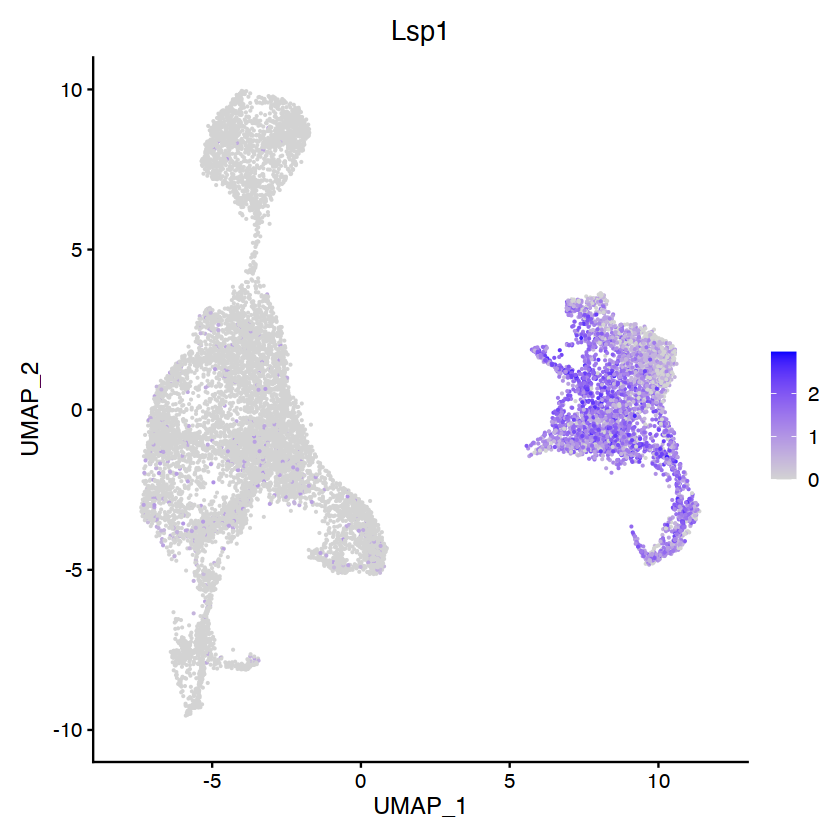

In [51]:
FeaturePlot(pbmc, features = "Lsp1")

In [52]:

pbmc[["CellType"]] <- Idents(object = pbmc)


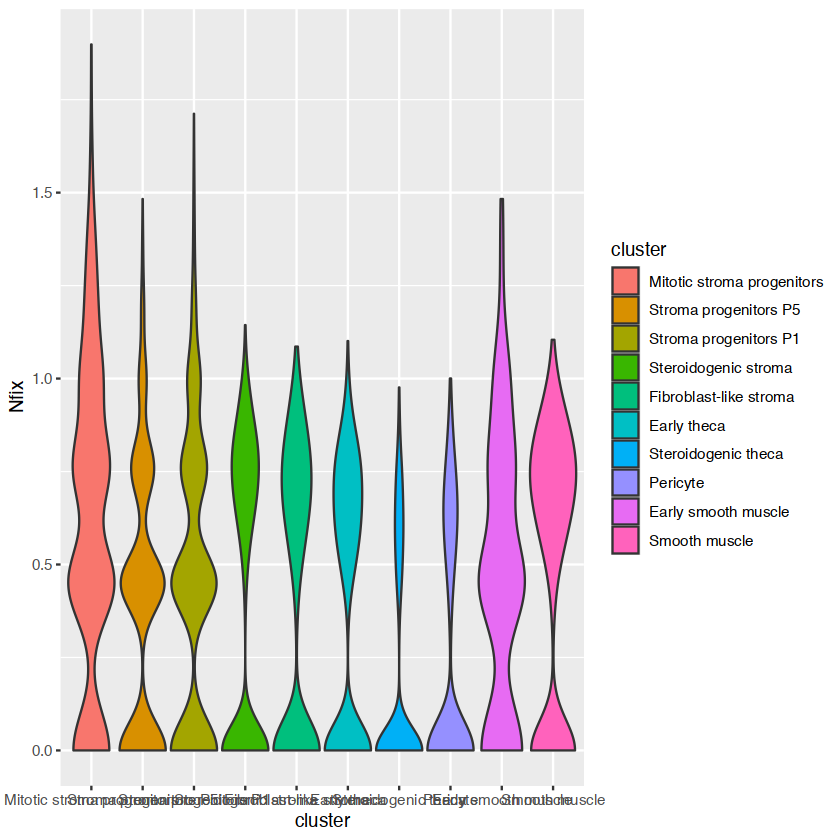

In [53]:
library("ggplot2")
vln_df = data.frame(Nfix = pbmc[["RNA"]]@data["Nfix",], cluster = Idents(pbmc))
ggplot(vln_df, aes(x = cluster, y = Nfix)) + geom_violin(aes(fill = cluster), trim=TRUE, scale = "width")

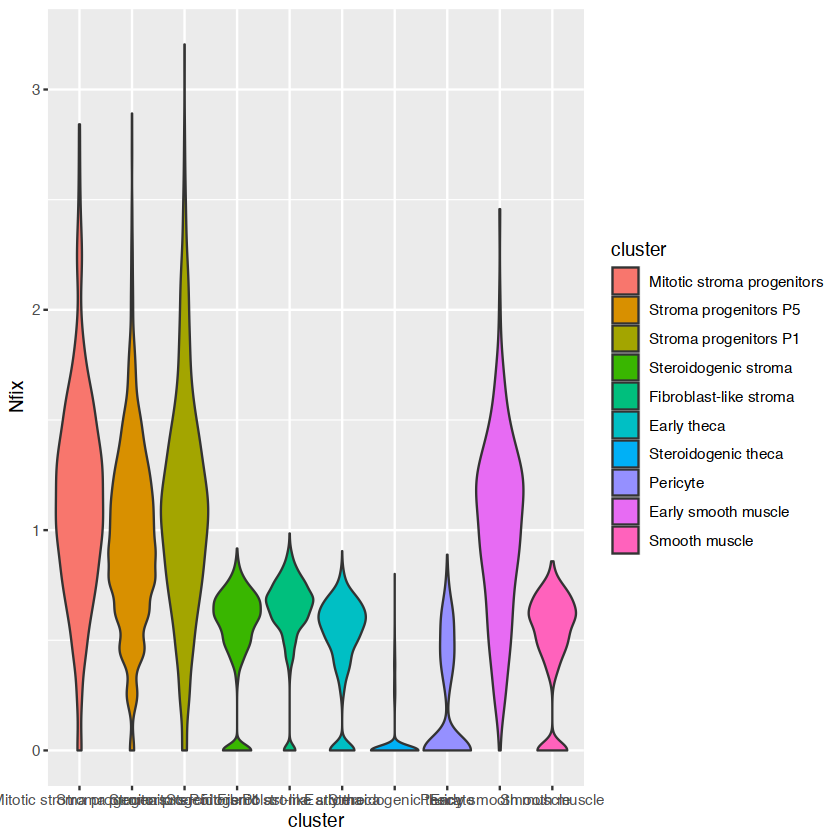

In [54]:

vln_df = data.frame(Nfix = pbmc[["RNA"]]@data["Col1a1",], cluster = Idents(pbmc))
ggplot(vln_df, aes(x = cluster, y = Nfix)) + geom_violin(aes(fill = cluster), trim=TRUE, scale = "width")

In [55]:
newLevels = c('Stroma progenitors P1',
              'Stroma progenitors P5',
              'Early theca',
              'Steroidogenic theca',
              'Fibroblast-like stroma',
              'Steroidogenic stroma',
              'Early smooth muscle',
              'Smooth muscle',
              'Pericyte',
              'Mitotic stroma progenitors'
              )
Idents(pbmc) <- factor(x = Idents(pbmc), levels = newLevels)

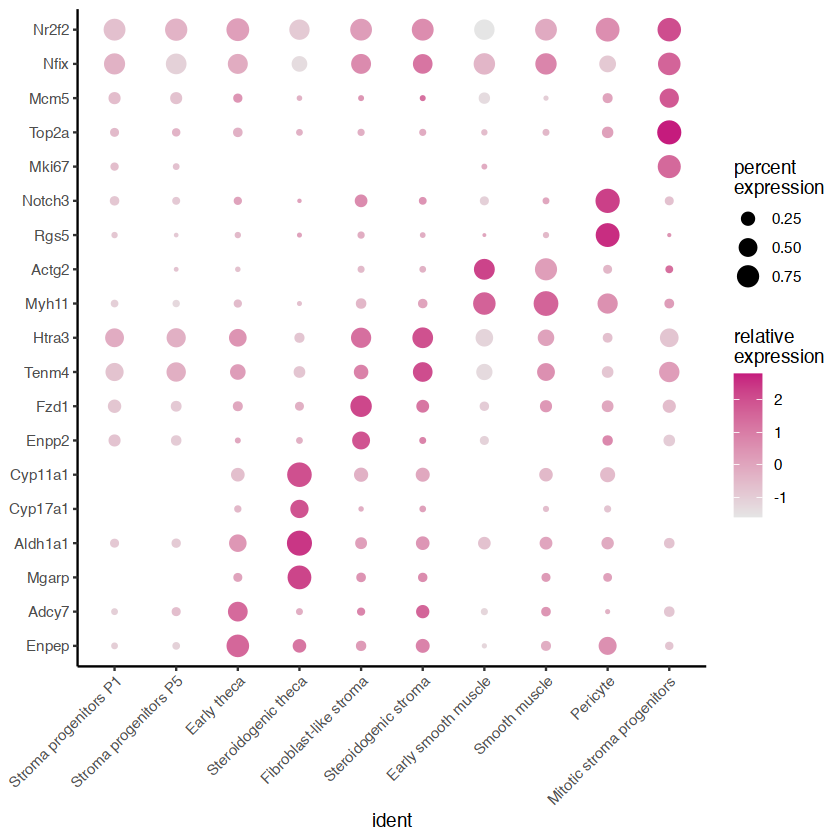

In [56]:
your_markers <- c('Enpep','Adcy7',# Early theca
                  'Mgarp','Aldh1a1','Cyp17a1','Cyp11a1', # Steroidogenic theca
                  'Enpp2','Fzd1', # Fibroblast-like stroma
                  'Tenm4','Htra3', # Steroidogenic stroma
                  'Myh11','Actg2', # Smooth muscle
                  
                  'Rgs5','Notch3', # Pericyte
                  "Mki67","Top2a","Mcm5", # Mitotic stroma progenitors
                  'Nfix','Nr2f2'
                  
                  
                 )
dittoDotPlot(pbmc, your_markers, group.by = "ident") + coord_flip()

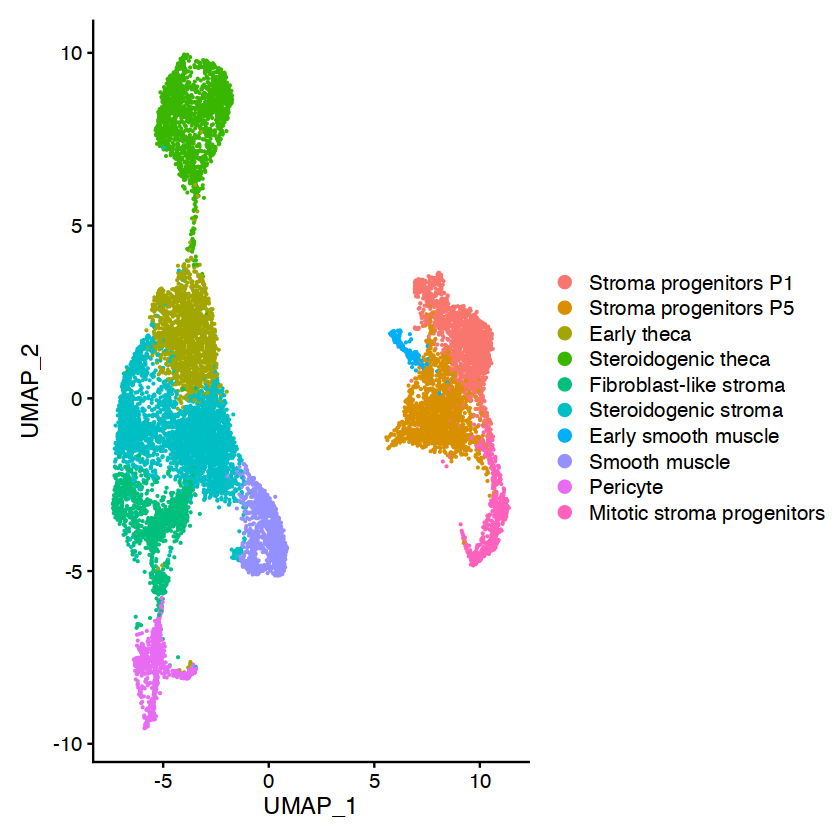

In [57]:
DimPlot(pbmc, reduction = "umap")

In [58]:
save(pbmc, file="data/morris-niu-Mesenchyme.Rdata")

In [ ]:
load("data/morris-niu-Mesenchyme.Rdata")